#08_FPHDP_Model_Comparison
This final analysis is based off of content in technologyCult's https://www.youtube.com/watch?v=AIewhpYT7Yc

Comparing ML Models in Scikit-Learn
https://www.youtube.com/watch?v=0pP4EwWJgIU&t=89s

https://stackoverflow.com/questions/61466909/when-do-you-use-gridsearchcv-vs-k-fold-in-sklearn
"GridSearchCV performs k-fold cross-validation, specified by the cv parameter. If the cv parameter is an integer, it represents the number of folds for k-fold cross-validation."

https://www.youtube.com/watch?v=AIewhpYT7Yc

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving heart.csv to heart (4).csv


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, roc_curve, auc, recall_score, precision_score, roc_auc_score, f1_score, matthews_corrcoef
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn import neighbors
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap



np.random.seed(42)

In [ ]:
#Pandas dataframe
heart = pd.read_csv("/content/heart.csv")

In [ ]:
numeric_features = heart.select_dtypes(include=[np.number])
numeric_features.columns

Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'HeartDisease'],
      dtype='object')

In [ ]:
categorical_features = heart.select_dtypes(include=[object])
categorical_features.columns

Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object')

In [ ]:

X= heart.drop('HeartDisease', axis=1)

y = heart['HeartDisease']



In [ ]:
model_cols = []
df=pd.DataFrame(columns=model_cols)
index=0

# Logistic Regression

In [ ]:
numeric_features = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']
numeric_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="median")), ("scaler", StandardScaler())]
)

categorical_features = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
categorical_transformer = OneHotEncoder(handle_unknown="ignore")

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ],
)

logreg = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", LogisticRegression())]
)

#https://www.youtube.com/watch?v=qmqCYC-MBQo by Siddhardhan: idea to
# startify y so that we have balanced response values within test set and
# training set.
# another resource on stratify y from Data School:
# https://www.youtube.com/watch?v=Zcjl8xPLmPw
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y, random_state=42)

logreg.fit(X_train, y_train)

# #https://www.youtube.com/watch?v=qmqCYC-MBQo by Siddhardhan: looking at accuracy score
X_train_prediction = logreg.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, y_train)
#print("Accuracy on training data :", training_data_accuracy)

df.loc[index,"Classifier"] ="Logistic Regression"
df.loc[index,"Train Accuracy"] = logreg.score(X_train, y_train)
df.loc[index, "Test Accuracy"] = logreg.score(X_test, y_test)
df.loc[index, "Precision"] = precision_score(y_test, logreg.predict(X_test))
df.loc[index, "Recall"] = recall_score(y_test, logreg.predict(X_test))
df.loc[index, "F1 Score"] = f1_score(y_test, logreg.predict(X_test))
df.loc[index, "MCC"] = matthews_corrcoef(y_test, logreg.predict(X_test))
index += 1
# print("model score on test set: %.3f" % logreg.score(X_test, y_test))

# Linear SVC

In [ ]:
missingvalue = ['RestingBP', 'Cholesterol']
mvtransformer = Pipeline(
    steps=[("imputer", KNNImputer(missing_values=0, n_neighbors=5)), ("scaler", StandardScaler())]
)

numregular = ['Age', 'FastingBS', 'MaxHR', 'Oldpeak']
numregulartransformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="median")), ("scaler", StandardScaler())]
)

categorical_features = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
categorical_transformer = OneHotEncoder(handle_unknown="ignore")

preprocessor = ColumnTransformer(
    transformers=[
        ("nummv", mvtransformer, missingvalue),
        ("numreg", numregulartransformer, numregular),
        ("cat", categorical_transformer, categorical_features),
    ],
)

linearsvc = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", LinearSVC(dual = False))]
)

# #https://www.youtube.com/watch?v=qmqCYC-MBQo by Siddhardhan: idea to
# # startify y so that we have a balanced response values within test set and
# # training set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y, random_state=42)

linearsvc.fit(X_train, y_train)

# #https://www.youtube.com/watch?v=qmqCYC-MBQo by Siddhardhan: looking at accuracy score
X_train_prediction = linearsvc.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, y_train)
#print("Accuracy on training data :", training_data_accuracy)

df.loc[index,"Classifier"] ="Linear SVC"
df.loc[index,"Train Accuracy"] = linearsvc.score(X_train, y_train)
df.loc[index, "Test Accuracy"] = linearsvc.score(X_test, y_test)
df.loc[index, "Precision"] = precision_score(y_test, linearsvc.predict(X_test))
df.loc[index, "Recall"] = recall_score(y_test, linearsvc.predict(X_test))
df.loc[index, "F1 Score"] = f1_score(y_test, linearsvc.predict(X_test))
df.loc[index, "MCC"] = matthews_corrcoef(y_test, linearsvc.predict(X_test))
index += 1
# print("model score on test set: %.3f" % linearsvc.score(X_test, y_test))

# KNN

In [ ]:
missingvalue = ['RestingBP', 'Cholesterol']
mvtransformer = Pipeline(
    steps=[("imputer", KNNImputer(missing_values=0, n_neighbors=5)), ("scaler", StandardScaler())]
)

numregular = ['Age', 'FastingBS', 'MaxHR', 'Oldpeak']
numregulartransformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="median")), ("scaler", StandardScaler())]
)

categorical_features = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
categorical_transformer = OneHotEncoder(handle_unknown="ignore")

preprocessor = ColumnTransformer(
    transformers=[
        ("nummv", mvtransformer, missingvalue),
        ("numreg", numregulartransformer, numregular),
        ("cat", categorical_transformer, categorical_features),
    ],
)

knn = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", neighbors.KNeighborsClassifier())]
)

# #https://www.youtube.com/watch?v=qmqCYC-MBQo by Siddhardhan: idea to
# # startify y so that we have a balanced response values within test set and
# # training set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y, random_state=42)

knn.fit(X_train, y_train)

# #https://www.youtube.com/watch?v=qmqCYC-MBQo by Siddhardhan: looking at accuracy score
X_train_prediction = knn.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, y_train)
#print("Accuracy on training data :", training_data_accuracy)

df.loc[index,"Classifier"] ="KNN"
df.loc[index,"Train Accuracy"] = knn.score(X_train, y_train)
df.loc[index, "Test Accuracy"] = knn.score(X_test, y_test)
df.loc[index, "Precision"] = precision_score(y_test, knn.predict(X_test))
df.loc[index, "Recall"] = recall_score(y_test, knn.predict(X_test))
df.loc[index, "F1 Score"] = f1_score(y_test, knn.predict(X_test))
df.loc[index, "MCC"] = matthews_corrcoef(y_test, knn.predict(X_test))
index += 1

# print("model score on test set: %.3f" % knn.score(X_test, y_test))

# Random Forest

In [ ]:
missingvalue = ['RestingBP', 'Cholesterol']
mvtransformer = Pipeline(
    steps=[("imputer", KNNImputer(missing_values=0, n_neighbors=5)), ("scaler", StandardScaler())]
)

numregular = ['Age', 'FastingBS', 'MaxHR', 'Oldpeak']
numregulartransformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="median")), ("scaler", StandardScaler())]
)

categorical_features = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
categorical_transformer = OneHotEncoder(handle_unknown="ignore")

preprocessor = ColumnTransformer(
    transformers=[
        ("nummv", mvtransformer, missingvalue),
        ("numreg", numregulartransformer, numregular),
        ("cat", categorical_transformer, categorical_features),
    ],
)

randomforest = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", RandomForestClassifier(n_estimators=100))]
)

#https://www.youtube.com/watch?v=qmqCYC-MBQo by Siddhardhan: idea to
# startify y so that we have a balanced response values within test set and
# training set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y, random_state=42)

randomforest.fit(X_train, y_train)

# #https://www.youtube.com/watch?v=qmqCYC-MBQo by Siddhardhan: looking at accuracy score
X_train_prediction = randomforest.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, y_train)
#print("Accuracy on training data :", training_data_accuracy)

df.loc[index,"Classifier"] ="Random Forest"
df.loc[index,"Train Accuracy"] = randomforest.score(X_train, y_train)
df.loc[index, "Test Accuracy"] = randomforest.score(X_test, y_test)
df.loc[index, "Precision"] = precision_score(y_test, randomforest.predict(X_test))
df.loc[index, "Recall"] = recall_score(y_test, randomforest.predict(X_test))
df.loc[index, "F1 Score"] = f1_score(y_test, randomforest.predict(X_test))
df.loc[index, "MCC"] = matthews_corrcoef(y_test, randomforest.predict(X_test))
index += 1

# print("model score on test set: %.3f" % randomforest.score(X_test, y_test))

# Voting Classification

In [ ]:
vc=VotingClassifier([('clf1', logreg),('clf2', linearsvc),('clf3', knn), ('clf4', randomforest)])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y, random_state=42)

vc.fit(X_train, y_train)

vc.fit(X, y)
vc.predict(X)
y_pred = vc.predict(X)
vc_accuracy_score =  accuracy_score(y, y_pred)
# print ("Training Accuracy on VC :", vc_accuracy_score)
# print("model score on test set: %.3f" % vc.score(X_test, y_test))

df.loc[index,"Classifier"] ="Voting Classifier"
df.loc[index,"Train Accuracy"] = vc.score(X_train, y_train)
df.loc[index, "Test Accuracy"] = vc.score(X_test, y_test)
df.loc[index, "Precision"] = precision_score(y_test, vc.predict(X_test))
df.loc[index, "Recall"] = recall_score(y_test, vc.predict(X_test))
df.loc[index, "F1 Score"] = f1_score(y_test, vc.predict(X_test))
df.loc[index, "MCC"] = matthews_corrcoef(y_test, vc.predict(X_test))


In [ ]:
#Classification Accuracy > Sensitivity: when the actual value is positive, how often is the prediction correct?
df

,Classifier,Train Accuracy,Test Accuracy,Precision,Recall,F1 Score,MCC
0,Logistic Regression,0.859673,0.885870,0.871560,0.931373,0.900474,0.769383
1,Linear SVC,0.862398,0.891304,0.894231,0.911765,0.902913,0.779672
2,KNN,0.871935,0.885870,0.900990,0.892157,0.896552,0.769332
3,Random Forest,1.000000,0.880435,0.884615,0.901961,0.893204,0.757615
4,Voting Classifier,0.889646,0.934783,0.950000,0.931373,0.940594,0.868530


Precision: when a positive value is **predicted**, how often is the prediciton correct? aka positive predictive value

Recall: when the **actual** value is positive, how often is the prediction correct? How sensitive is the classifier to detecting positive instance? aka TPR and Sensitivity.

$F_1$: the harmonic mean of the precision and recall. https://en.wikipedia.org/wiki/F-score

The Matthews correlation coefficient is used in machine learning as a measure of the quality of binary and multiclass classifications. It takes into account true and false positives and negatives and is generally regarded as a balanced measure which can be used even if the classes are of very different sizes. The MCC is in essence a correlation coefficient value between -1 and +1. A coefficient of +1 represents a perfect prediction, 0 an average random prediction and -1 an inverse prediction. The statistic is also known as the phi coefficient. [source: Wikipedia]





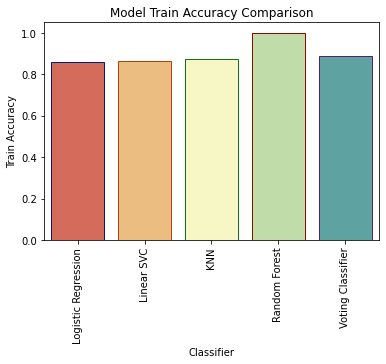

In [ ]:
import seaborn as sns
sns.barplot(x='Classifier', y='Train Accuracy', data=df, palette = 'Spectral', edgecolor=sns.color_palette('dark', 7))
plt.xticks(rotation=90)
plt.title("Model Train Accuracy Comparison")
plt.show()

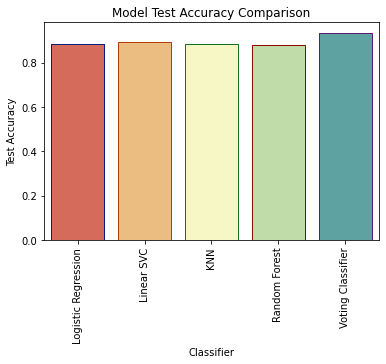

In [ ]:
sns.barplot(x='Classifier', y='Test Accuracy', data=df, palette = 'Spectral', edgecolor=sns.color_palette('dark', 7))
plt.xticks(rotation=90)
plt.title("Model Test Accuracy Comparison")
plt.show()

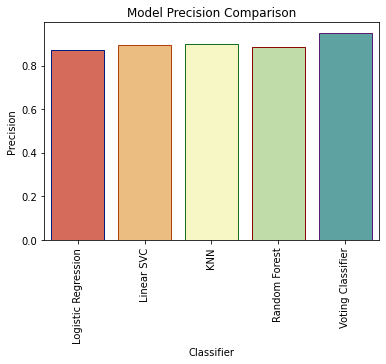

In [ ]:
sns.barplot(x='Classifier', y='Precision', data=df, palette = 'Spectral', edgecolor=sns.color_palette('dark', 7))
plt.xticks(rotation=90)
plt.title("Model Precision Comparison")
plt.show()

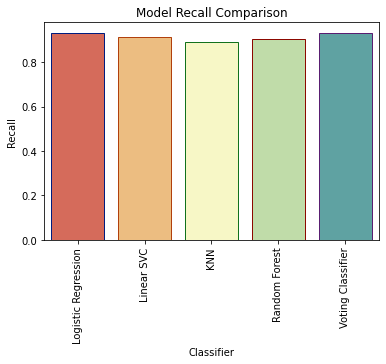

In [ ]:
sns.barplot(x='Classifier', y='Recall', data=df, palette = 'Spectral', edgecolor=sns.color_palette('dark', 7))
plt.xticks(rotation=90)
plt.title("Model Recall Comparison")
plt.show()

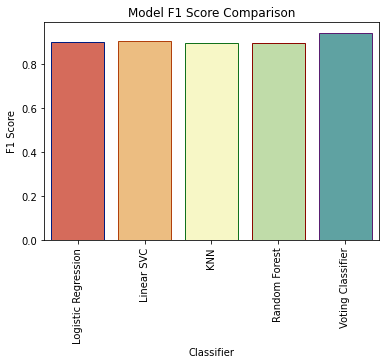

In [ ]:
sns.barplot(x='Classifier', y='F1 Score', data=df, palette = 'Spectral', edgecolor=sns.color_palette('dark', 7))
plt.xticks(rotation=90)
plt.title("Model F1 Score Comparison")
plt.show()

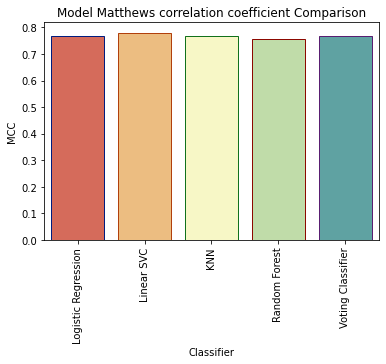

In [ ]:
sns.barplot(x='Classifier', y='MCC', data=df, palette = 'Spectral', edgecolor=sns.color_palette('dark', 7))
plt.xticks(rotation=90)
plt.title("Model Matthews correlation coefficient Comparison")
plt.show()

https://seaborn.pydata.org/tutorial/color_palettes.html

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.matthews_corrcoef.html?highlight=matthews%20correlation%20coefficient